In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('data (2).csv')

In [3]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [4]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

,count,mean,std,min,25%,50%,75%,max
Age,400.0,31.7050,12.139043,15.0,22.0,28.0,40.0,77.0
Duration,400.0,1.6100,0.770964,1.0,1.0,1.0,2.0,3.0
Frequency,400.0,2.3650,1.675947,1.0,1.0,2.0,4.0,8.0
Location,400.0,0.9725,0.268186,0.0,1.0,1.0,1.0,2.0
Character,400.0,0.9775,0.277825,0.0,1.0,1.0,1.0,2.0
Intensity,400.0,2.4700,0.768490,0.0,2.0,3.0,3.0,3.0
Nausea,400.0,0.9875,0.111242,0.0,1.0,1.0,1.0,1.0
Vomit,400.0,0.3225,0.468019,0.0,0.0,0.0,1.0,1.0
Phonophobia,400.0,0.9775,0.148489,0.0,1.0,1.0,1.0,1.0
Photophobia,400.0,0.9800,0.140175,0.0,1.0,1.0,1.0,1.0


In [5]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [6]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Age': [30 50 53 45 49 27 24 23 48 51 34 20 40 56 44 46 25 38 35 17 36 31 67 22
 68 43 41 37 26 54 16 33 70 28 29 69 21 64 32 52 47 39 57 58 42 77 18 59
 55 19 15]
Unique values in column 'Duration': [1 3 2]
Unique values in column 'Frequency': [5 1 2 8 7 6 4 3]
Unique values in column 'Location': [1 2 0]
Unique values in column 'Character': [1 2 0]
Unique values in column 'Intensity': [2 3 1 0]
Unique values in column 'Nausea': [1 0]
Unique values in column 'Vomit': [0 1]
Unique values in column 'Phonophobia': [1 0]
Unique values in column 'Photophobia': [1 0]
Unique values in column 'Visual': [1 2 4 0 3]
Unique values in column 'Sensory': [2 1 0]
Unique values in column 'Dysphasia': [0 1]
Unique values in column 'Dysarthria': [0 1]
Unique values in column 'Vertigo': [0 1]
Unique values in column 'Tinnitus': [0 1]
Unique values in column 'Hypoacusis': [0 1]
Unique values in column 'Diplopia': [0 1]
Unique values in column 'Defect': [0 1]
Unique values in column

In [7]:
df['Type'] = df['Type'].replace({'Typical aura with migraine': 1, 'Migraine without aura': 2, 'Basilar-type aura': 3, 'Sporadic hemiplegic migraine': 4, 'Familial hemiplegic migraine': 5, 'Other': 6, 'Typical aura without migraine': 7})


<Axes: >

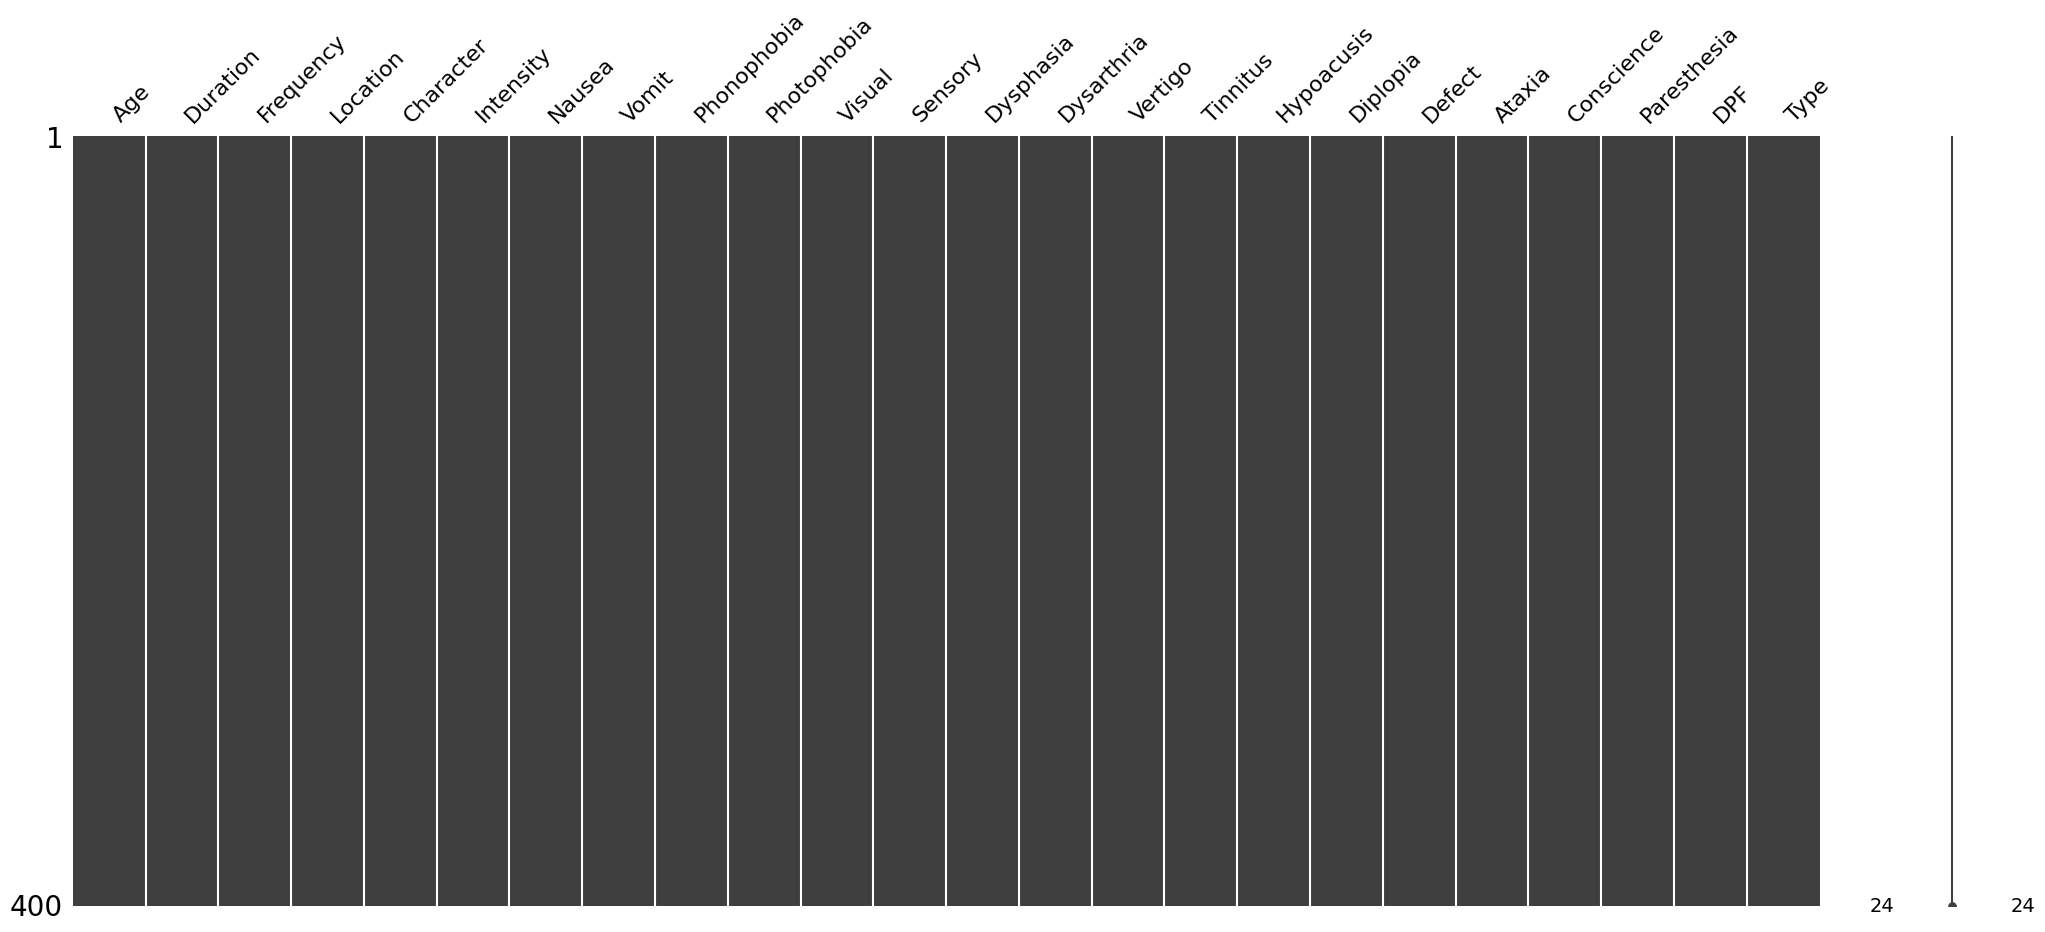

In [8]:
msno.matrix(df)

                 Type
Age         -0.160329
Duration     0.088449
Frequency   -0.040709
Location    -0.325147
Character   -0.274937
Intensity   -0.388277
Nausea      -0.255521
Vomit        0.090076
Phonophobia -0.327769
Photophobia -0.308629
Visual       0.113233
Sensory      0.120887
Dysphasia    0.215174
Dysarthria   0.052727
Vertigo      0.444110
Tinnitus     0.353504
Hypoacusis   0.061655
Diplopia     0.035417
Defect       0.061655
Ataxia            NaN
Conscience   0.087789
Paresthesia  0.043431
DPF          0.256096
Type         1.000000


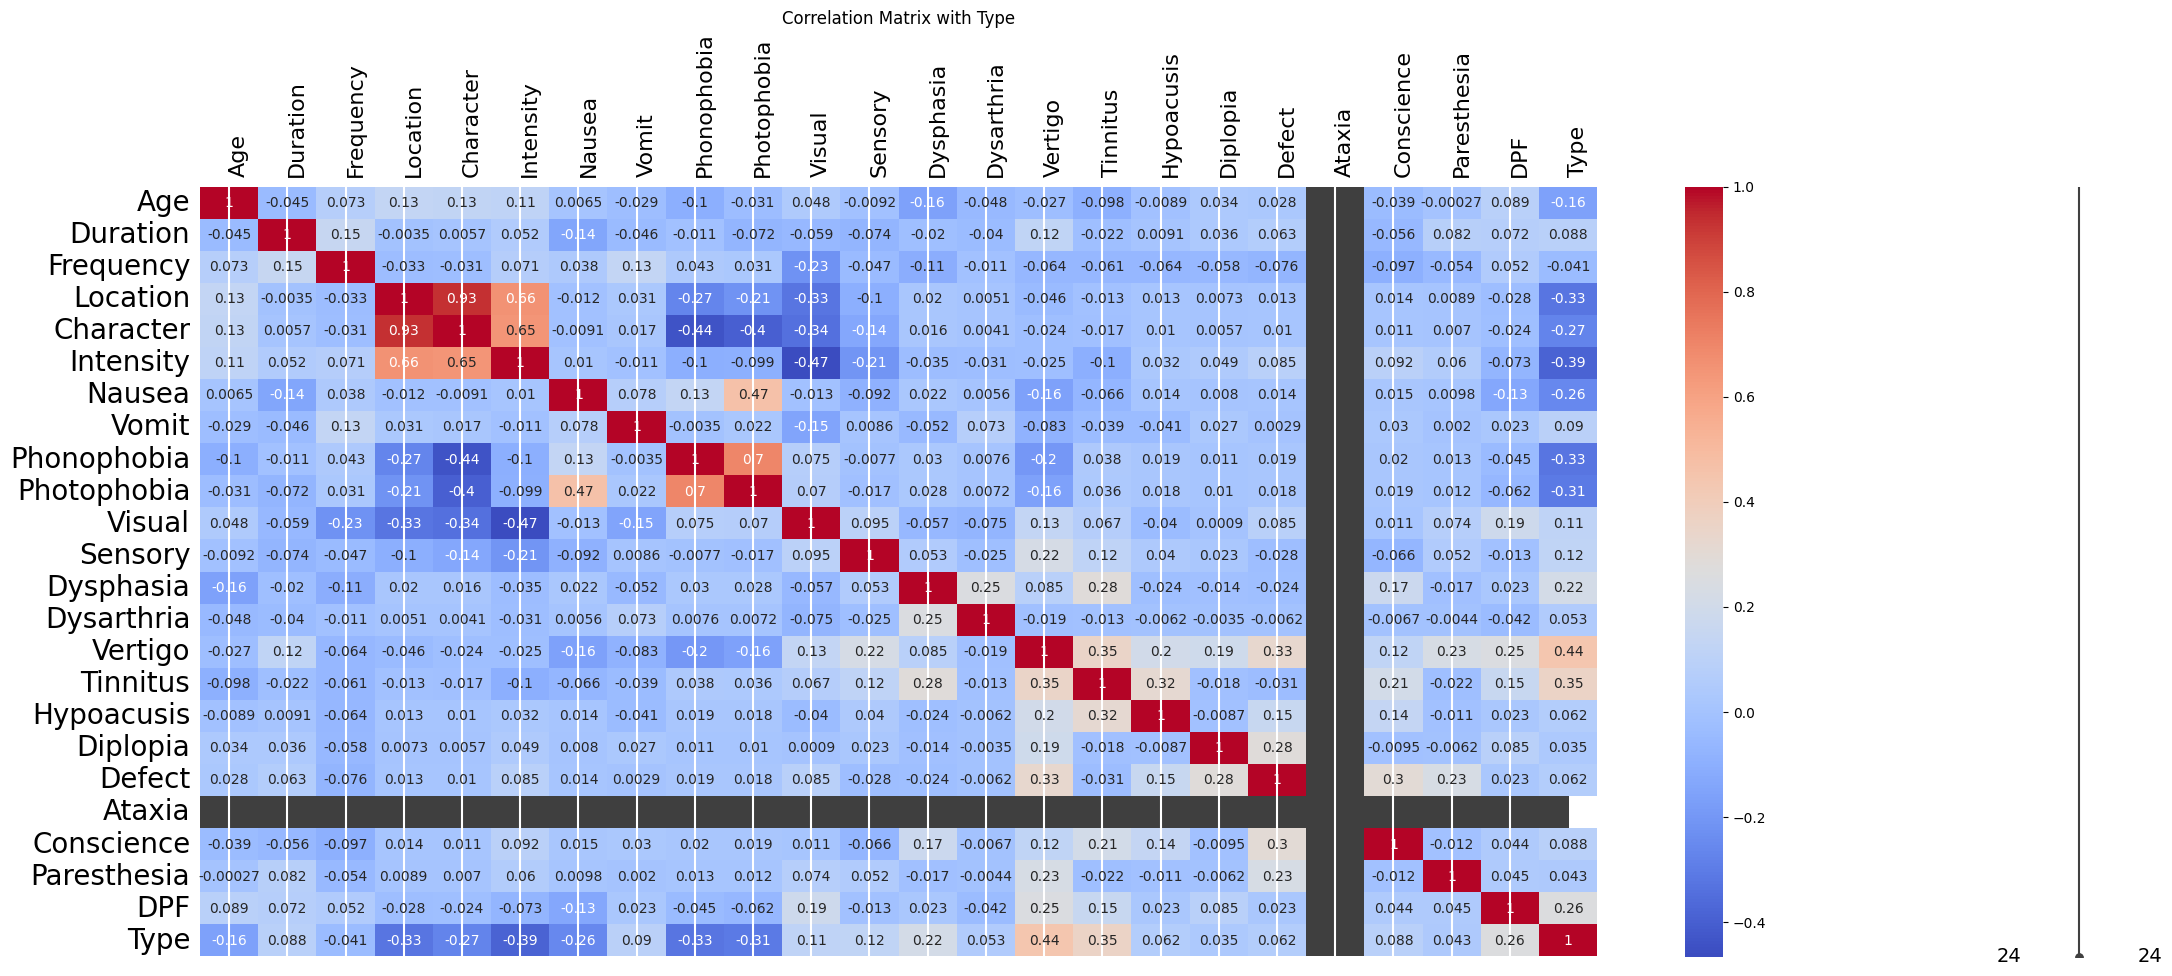

In [9]:
msno.matrix(df)

chosen_column = "Type" 

# for col in df.columns:
#     if col != chosen_column:
#         plt.scatter(df[chosen_column], df[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = df.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

In [10]:
del df["Ataxia"]

In [11]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,0,1,0,0,1,0,0,0,1
396,20,3,2,1,1,3,1,0,1,1,...,0,0,0,1,1,0,0,0,0,1
397,28,3,2,1,1,3,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
398,20,3,1,1,1,3,1,0,1,1,...,0,0,1,0,0,0,0,0,1,1


In [13]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     2
6     3
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    2
Name: Type, dtype: int64

In [14]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [18]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

AttributeError: 'Series' object has no attribute 'append'

In [19]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [20]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [21]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [22]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [23]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = classifier.predict(X_test)

In [24]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [25]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 89.16666666666667
K Nearest neighbors: 63.33333333333333
Support Vector Classifier: 89.16666666666667
Naive Bayes: 86.66666666666667
Decision tree: 81.66666666666667
Random Forest: 89.16666666666667


In [26]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("migraine.pkl","wb")
pickle.dump(svc, pickle_out)
pickle_out.close()